In [59]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [90]:
import seaborn as sns

In [91]:
sns.set_style('white')
sns.set_context('talk', font_scale=1.1)
palette = sns.color_palette("colorblind", 5)

In [195]:
tif_HH = "/media/nsteiner/data3/nisar/cases/bangladesh/HHHH_DB_SUBSET.tif"
tif_HV = "/media/nsteiner/data3/nisar/cases/bangladesh/HVHV_DB_SUBSET.tif"

with rasterio.open(tif_HH) as src:
    HHHH_DB = src.read(1)
with rasterio.open(tif_HV) as src:
    HVHV_DB = src.read(1)
HHHH_flat = HHHH_DB.flatten()
HVHV_flat = HVHV_DB.flatten()

print('HHHH stats:' + str(np.nanmin(HHHH_flat)) + ', ' + str(np.nanmax(HHHH_flat)) + ', ' + str(np.nanmean(HHHH_flat)))
print('HVHV stats:' + str(np.nanmin(HVHV_flat)) + ', ' + str(np.nanmax(HVHV_flat)) + ', ' + str(np.nanmean(HVHV_flat)))

    

HHHH stats:-140.47208, 28.388514, -8.451321
HVHV stats:-148.16888, 15.018486, -14.014515


In [196]:
valid_ = (-40, 20)

# set valid_range
HHHH_DB = np.where((HHHH_DB >= valid_[0]) & (HHHH_DB <= valid_[1]), HHHH_DB, np.nan)
HVHV_DB = np.where((HVHV_DB >= valid_[0]) & (HVHV_DB <= valid_[1]), HVHV_DB, np.nan)


# flatten
HHHH_flat = HHHH_DB.flatten()
HVHV_flat = HVHV_DB.flatten()
palette = sns.color_palette("colorblind")



In [197]:

HHHH_flat = HHHH_DB.flatten()
HVHV_flat = HVHV_DB.flatten()

print('HHHH stats:' + str(np.nanmin(HHHH_flat)) + ', ' + str(np.nanmax(HHHH_flat)) + ', ' + str(np.nanmean(HHHH_flat)))
print('HVHV stats:' + str(np.nanmin(HVHV_flat)) + ', ' + str(np.nanmax(HVHV_flat)) + ', ' + str(np.nanmean(HVHV_flat)))


HHHH stats:-39.989254, 19.992735, -8.370636
HVHV stats:-39.999958, 15.018486, -13.92917


In [198]:
flatten_ = {'HHHH': HHHH_flat, 'HVHV': HVHV_flat}
# stack into dataframe
import pandas as pd
df_list = []
for key, value in flatten_.items():
    df_temp = pd.DataFrame({'band': key, 'backscatter (dB)': value})
    df_list.append(df_temp)
df = pd.concat(df_list, ignore_index=True)



In [199]:
print(len(df))

16210112


In [200]:
import pathlib
output_dir = pathlib.Path('/media/nsteiner/data3/nisar_/plots/')
output_dir.mkdir(parents=True, exist_ok=True)

/tmp/ipykernel_318362/4132804282.py:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.histplot(data=df_subset, x='backscatter (dB)', hue='band', element='step', stat='density',


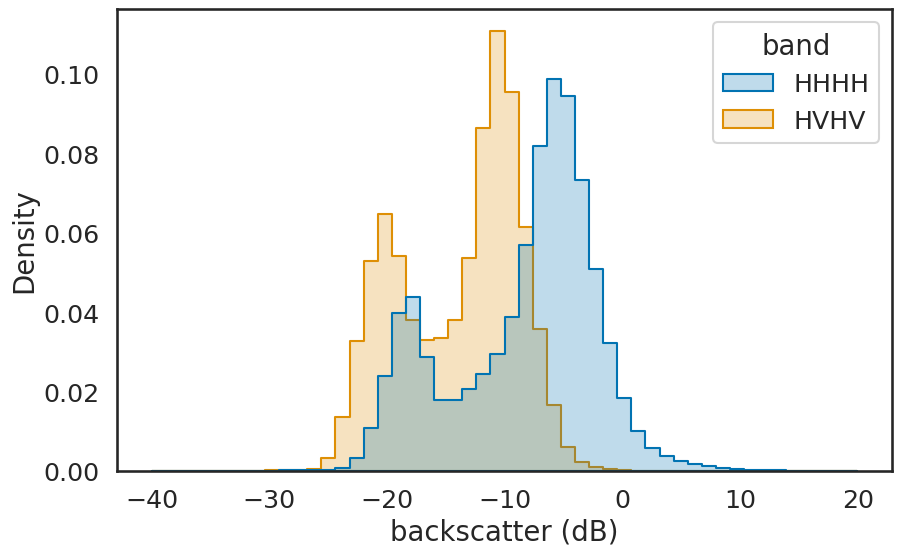

In [201]:
df_subset = df.sample(n=1891077, random_state=42)
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=df_subset, x='backscatter (dB)', hue='band', element='step', stat='density',
                common_norm=False, palette=palette, bins=50, ax=ax)
plt.savefig('/media/nsteiner/data3/nisar_/plots/banledesh.png', dpi=300)